Elisa Stabilini - 28326A

# Esercitazione esame di probabilità e statistica

## Tema d'esame:

Si consideri il file di dati allegato che riporta i prezzi di case/stanze su Airbnb  a New York assieme ad altre informazioni (fattori). Si chiede di fornire un notebook con visualizzazioni e analisi statistiche con lo scopo di stabilire quali siano i cofattori che maggiormente influenzano il prezzo.

Il notebook dovrebbe contenere:
* Analisi quantitativa dei prezzi (a scelta: box plot, istogrammi etc)
* Analisi di correlazione (a scelta matrice di correlazione, PCA, plot di correlazione etc.)
* Almeno un fit di una distribuzione con il metodo di massima verosimiglianza
* Almeno un test statistico di significatività

Per ogni figura è necessaria una descrizione dettagliata (caption). Il notebook deve contenere almeno 4 figure e max 8 figure. Concludere il notebook con una discussione dei risultati ottenuti.

**Importazione librerie**

In [1]:
%matplotlib inline
import pandas as pd
from scipy.stats import trim_mean
import statsmodels
from statsmodels import robust

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

**Importazione dei dati**

In [3]:
V 

In [4]:
datas

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


**Prima analisi dati**

Per prima cosa cerco di capire quali sono le caratteristiche principali che determinano il prezzo di una stanza. In particolare posso considerare il *quartiere* e il *vicinato* in cui si trovano, il voto associato alla stanza e il tipo di stanza che viene affittata.

Questa prima analisi dati viene fatta con dei boxplot e un'analisi della dispersione dei dati rispetto alle caratteristiche scelte, nello specifico faccio dei boxplot categorici. All'interno della stessa categoria dopo di che posso dividere sulla base di altre proprietà del gruppo dei dati.

Dal dataset elimino i dati per cui il prezzo non è riportato oppure è un NaN, in questo modo elimino tutto ciò che non mi è utile all'analisi.

In [5]:
datas = datas.dropna()
datas = datas.loc[(datas.price != 0)]

In [6]:
datas

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


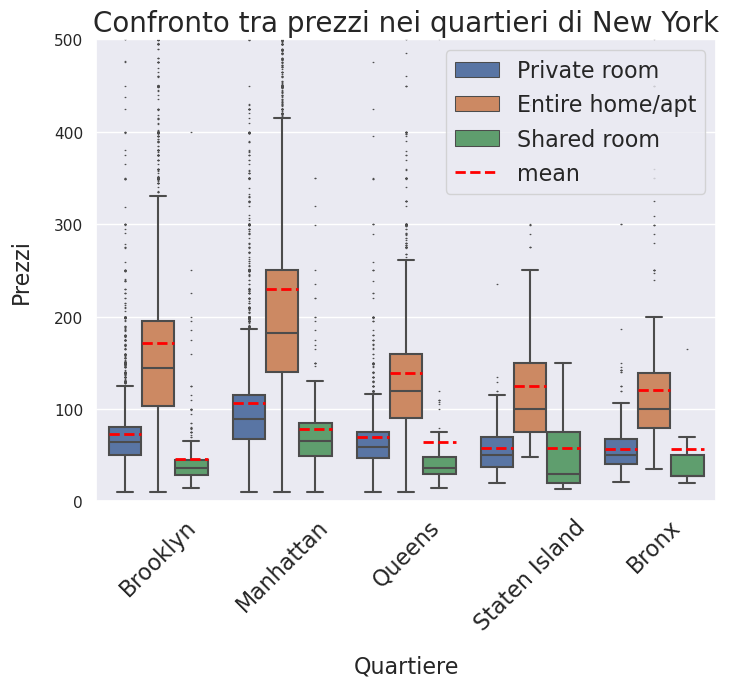

In [8]:
# Barplot (senza outliers)
sns.set(rc = {'figure.figsize':(8,6)})

meanprops=dict(c='red',lw=2)
ax=sns.boxplot(data=datas, x="neighbourhood_group", y="price", hue="room_type", fliersize=0.3, showmeans=True, meanline=True, meanprops=meanprops)

# Costruisco una legenda che contenga anche l'informazione sulla media
custom_lines = [Line2D([0], [0], color='red', lw=2,ls='--')]
handles, l = ax.get_legend_handles_labels()         
handles1 = np.append(handles,custom_lines)
l1=np.append(l, "mean")
ax.legend(handles1, l1, loc="best", fontsize=16)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=16)

plt.ylim((0,500))
ax.set_xlabel(r'Quartiere', fontsize=16, labelpad=15)
ax.set_ylabel(r'Prezzi', fontsize=16, labelpad=15)
ax.set_title(f"Confronto tra prezzi nei quartieri di New York", fontsize=20);

**Figura 1:** Boxplot dei prezzi per notte delle stanze in funzione del quartiere in cui si trovano e del tipo di stanza che viene affittata.

Data una qualunque tipologia di stanza in uno dei quartieri della città, le distribuzioni dei prezzi sono fortemente asimmetriche e presentano numerosi outliers, come si può notare dalla Fig. 1. Nel grafico precedente, l'asimmetria nella distribuzione dei prezzi è resa visibile dal fatto che spesso la media (linea rossa tratteggiata) è maggiore della mediana (linea interquartile visibile nel box). 

Come ci si poteva asppetare il prezzo richiesto per l'affitto di un appartamento dipende fortemente dal quartiere in cui questo è situato e dalla tipologia di alloggio. Il prezzo per l'affitto di un intero appartamento è mediamente più alto di quello richiesto per l'affitto di una stanza singola, che a sua volta è più alto del prezzo richiesto per l'affitto di una stanza condivisa.

In quest'ottica, se ci fossero i dati a disposizione sarebbe interessante anche studiare l'andamento del prezzo per l'affitto di un posto letto in una stanza condivisa al variare del numero di letti disponibili all'interno dell'unità abitativa.

Un altro aspetto interessante da osservare è il fatto che, a seconda della tipologia di alloggio si ha una differenza di prezzo più o meno significativa al variare del quartire: questa differenza particolarmente importante nel prezzo dell'affitto di un intero appartamento, si riduce se si prendono in considerazione rispettivamente le tipologie di alloggio stanza singola e stanza condivisa.

A questo punto provo a fare altri boxplot per studiare la possibile presenza di correllazione tra il prezzo dell'alloggio e altre variabili. I grafici verrano riportati solo se contenenti risultati degni di nota.

In [ ]:
lovely, cozy, quiet